# 18763- System and Toolchains for AI Engineers

## Homework-4: Data Engineering

## Question 1: Display the count of each protocol_type

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

# Initialize Spark session [1]
spark = SparkSession.builder \
    .appName("NSL-KDD Analysis") \
    .getOrCreate()

# Column names for NSL-KDD dataset [2]
col_names = [
    "duration", "protocol_type", "service", "flag", "src_bytes",
    "dst_bytes", "land", "wrong_fragment", "urgent", "hot", 
    "num_failed_logins", "logged_in", "num_compromised", "root_shell", 
    "su_attempted", "num_root", "num_file_creations", "num_shells", 
    "num_access_files", "num_outbound_cmds", "is_host_login", 
    "is_guest_login", "count", "srv_count", "serror_rate", 
    "srv_serror_rate", "rerror_rate", "srv_rerror_rate", 
    "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", 
    "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", 
    "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", 
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", 
    "dst_host_srv_serror_rate", "dst_host_rerror_rate", 
    "dst_host_srv_rerror_rate", "classes", "difficulty_level"
]

# Loading the dataset
df = spark.read.csv("./NSL-KDD/KDDTrain+.txt", header=False, inferSchema=True).toDF(*col_names)

# Count of each protocol_type for logged in users
logged_count = df.filter(df.logged_in == 1) \
    .groupBy("protocol_type") \
    .agg(F.count("*").alias("count"))

# Add a logged_in column to differentiate logged in users
logged_count = logged_count.withColumn("logged_in", F.lit(1))

# Count of each protocol_type for non-logged in users
not_logged_count = df.filter(df.logged_in == 0) \
    .groupBy("protocol_type") \
    .agg(F.count("*").alias("count"))

# Add a logged_in column for non-logged in users
not_logged_count = not_logged_count.withColumn("logged_in", F.lit(0))

# Combine both counts into one DataFrame
combined_counts = logged_count.union(not_logged_count)

# Show the combined results
combined_counts.show()




Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/10/03 17:56:42 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


+-------------+-----+---------+
|protocol_type|count|logged_in|
+-------------+-----+---------+
|          tcp|49852|        1|
|          tcp|52837|        0|
|          udp|14993|        0|
|         icmp| 8291|        0|
+-------------+-----+---------+



## Question 2: Normal traffic and override the protocol_type to “tcp”

In [2]:
from pyspark.sql import functions as F

# Filter the DataFrame for normal traffic (traffic with no attacks identified)
normal_traffic_df = df.filter(df['classes'] == "normal") 

# Override the all protocol_type to "tcp"
normal_traffic_override_df = normal_traffic_df.withColumn("protocol_type", F.lit("tcp"))

# Show a sample output - 20 rows
normal_traffic_override_df.sample(fraction=0.1).show(20) 


+--------+-------------+--------+----+---------+---------+----+--------------+------+---+-----------------+---------+---------------+----------+------------+--------+------------------+----------+----------------+-----------------+-------------+--------------+-----+---------+-----------+---------------+-----------+---------------+-------------+-------------+------------------+--------------+------------------+----------------------+----------------------+---------------------------+---------------------------+--------------------+------------------------+--------------------+------------------------+-------+----------------+
|duration|protocol_type| service|flag|src_bytes|dst_bytes|land|wrong_fragment|urgent|hot|num_failed_logins|logged_in|num_compromised|root_shell|su_attempted|num_root|num_file_creations|num_shells|num_access_files|num_outbound_cmds|is_host_login|is_guest_login|count|srv_count|serror_rate|srv_serror_rate|rerror_rate|srv_rerror_rate|same_srv_rate|diff_srv_rate|srv_dif

24/10/03 17:56:52 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [3]:
# To visualise clearly
normal_traffic_override_df.select("duration", "protocol_type", "service", "classes").show(20)


+--------+-------------+--------+-------+
|duration|protocol_type| service|classes|
+--------+-------------+--------+-------+
|       0|          tcp|ftp_data| normal|
|       0|          tcp|   other| normal|
|       0|          tcp|    http| normal|
|       0|          tcp|    http| normal|
|       0|          tcp|    http| normal|
|       0|          tcp|    http| normal|
|       0|          tcp|    http| normal|
|       0|          tcp|    http| normal|
|       0|          tcp|    http| normal|
|    5607|          tcp|   other| normal|
|     507|          tcp|  telnet| normal|
|       0|          tcp|    http| normal|
|       0|          tcp|    http| normal|
|       0|          tcp|    http| normal|
|       0|          tcp|    http| normal|
|       0|          tcp|domain_u| normal|
|       1|          tcp| private| normal|
|       0|          tcp|domain_u| normal|
|       0|          tcp|    http| normal|
|       2|          tcp|    smtp| normal|
+--------+-------------+--------+-

## Question 3: Q1 and Q2 on Spark cluster hosted on the cloud

- Screenshots q3_1, q3_2 and q3_3.png show the outputs for the first two questions executed on spark cluser. The url is visible on top along with the cluster name beneath it [3].

## Question 4:  NSL-KDD dataset into Postgres Database table.

In [ ]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from sqlalchemy import create_engine

# Define PostgreSQL connection parameters
DB_HOST = 'localhost'
DB_PORT = '5432'
DB_NAME = 'nsl_kdd'
DB_USER = 'saadhikhashree'
DB_PASSWORD = 'saadhikha'


# Define the column names
col_names = [
    "duration", "protocol_type", "service", "flag", "src_bytes",
    "dst_bytes", "land", "wrong_fragment", "urgent", "hot", 
    "num_failed_logins", "logged_in", "num_compromised", "root_shell", 
    "su_attempted", "num_root", "num_file_creations", "num_shells", 
    "num_access_files", "num_outbound_cmds", "is_host_login", 
    "is_guest_login", "count", "srv_count", "serror_rate", 
    "srv_serror_rate", "rerror_rate", "srv_rerror_rate", 
    "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", 
    "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", 
    "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", 
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", 
    "dst_host_srv_serror_rate", "dst_host_rerror_rate", 
    "dst_host_srv_rerror_rate", "classes", "difficulty_level"
]

# Create a Spark session
spark = SparkSession.builder \
    .appName("NSL-KDD Ingestion") \
    .getOrCreate()

# Load the training dataset
train = spark.read.csv("./NSL-KDD/KDDTrain+.txt", header=False, inferSchema=True).toDF(*col_names)

# Load the testing dataset
test = spark.read.csv("./NSL-KDD/KDDTest+.txt", header=False, inferSchema=True).toDF(*col_names)

# Add a column called 'dataset_type' to differentiate between train and test datasets
train = train.withColumn('dataset_type', F.lit('train'))
test = test.withColumn('dataset_type', F.lit('test'))

# Combine both datasets
combined_data = train.union(test)

# Convert Spark DataFrame to Pandas DataFrame for PostgreSQL ingestion
combined_df = combined_data.toPandas()

# Create a SQLAlchemy engine for PostgreSQL
engine = create_engine(f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}')

# Ingest the data into PostgreSQL table
# Using the to_sql method is convenient and allows for quick ingestion without needing to define the schema upfront.
combined_df.to_sql('nsl_kdd', engine, if_exists='replace', index=False)

# Close the Spark session
spark.stop()


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import rand

# Create a Spark session
spark = SparkSession.builder \
    .appName("Read from PostgreSQL") \
    .config("spark.jars", "/Users/saadhikhashree/Downloads/postgresql-42.7.4.jar") \
    .getOrCreate()


# Define JDBC URL
jdbc_url = f"jdbc:postgresql://{DB_HOST}:{DB_PORT}/{DB_NAME}"

# Define connection properties
connection_properties = {
    "user": DB_USER,
    "password": DB_PASSWORD,
    "driver": "org.postgresql.Driver"
}

# Read data from the PostgreSQL table into a Spark DataFrame
nsl_kdd_df = spark.read.jdbc(url=jdbc_url, table='nsl_kdd', properties=connection_properties)

# Show the first few rows of the DataFrame
# nsl_kdd_df.show(5)
# Show random 5 rows to see if the data_type colum has the train and test values saved as expected 
random_sample_df = nsl_kdd_df.orderBy(rand()).limit(5)

# Display the random sample
random_sample_df.show()



- Screenshots verifying the table being created using psql is attached as q4_1, q4_2, q4_3,q4_4

## Question 5: Feature engineering 

<h2>1. Data Ingestion</h2>

In [1]:
import pyspark

from pyspark.sql import SparkSession
from pyspark import SparkContext, SQLContext

appName = "Big Data Analytics"
master = "local"


In [2]:
# Create or retrieve the Spark session
spark = SparkSession.builder \
    .appName("Big Data Analytics") \
    .master("local") \
    .config("spark.jars", "/Users/saadhikhashree/Downloads/postgresql-42.7.4.jar") \
    .getOrCreate()

# Create an SQLContext from the Spark session
sqlContext = SQLContext(spark.sparkContext)

24/10/03 16:12:24 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/10/03 16:12:24 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
/opt/anaconda3/lib/python3.11/site-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [3]:
# Read the dataset
df1 = spark.read.csv("plays.csv",header=True, inferSchema= True)

In [4]:
# Connect to Postgres
db_properties={}
db_properties['username']="postgres"
db_properties['password']="saadhikha"
db_properties['url']= "jdbc:postgresql://localhost:5432/postgres"
db_properties['driver']="org.postgresql.Driver"
db_properties['table']= "plays"

# Write to Postgres
df1.write.format("jdbc")\
.mode("overwrite")\
.option("url", db_properties['url'])\
.option("dbtable", db_properties['table'])\
.option("user", db_properties['username'])\
.option("password", db_properties['password'])\
.option("Driver", db_properties['driver'])\
.save()


24/10/03 16:13:16 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [5]:
# Read from Postgres

df1_read = sqlContext.read.format("jdbc")\
    .option("url", db_properties['url'])\
    .option("dbtable", db_properties['table'])\
    .option("user", db_properties['username'])\
    .option("password", db_properties['password'])\
    .option("Driver", db_properties['driver'])\
    .load()

df1_read.show(1, vertical=True)

-RECORD 0--------------------------------------
 gameId                 | 2017091004           
 playId                 | 37                   
 quarter                | 1                    
 GameClock              | 2024-10-03 15:00:00  
 down                   | 0                    
 yardsToGo              | 0                    
 possessionTeam         | DET                  
 yardlineSide           | DET                  
 yardlineNumber         | 35                   
 offenseFormation       | NA                   
 personnel.offense      | NA                   
 defendersInTheBox      | NA                   
 numberOfPassRushers    | NA                   
 personnel.defense      | NA                   
 HomeScoreBeforePlay    | 0                    
 VisitorScoreBeforePlay | 0                    
 HomeScoreAfterPlay     | 0                    
 VisitorScoreAfterPlay  | 0                    
 isPenalty              | false                
 isSTPlay               | true          

In [6]:
df1.dtypes

[('gameId', 'int'),
 ('playId', 'int'),
 ('quarter', 'int'),
 ('GameClock', 'timestamp'),
 ('down', 'int'),
 ('yardsToGo', 'int'),
 ('possessionTeam', 'string'),
 ('yardlineSide', 'string'),
 ('yardlineNumber', 'string'),
 ('offenseFormation', 'string'),
 ('personnel.offense', 'string'),
 ('defendersInTheBox', 'string'),
 ('numberOfPassRushers', 'string'),
 ('personnel.defense', 'string'),
 ('HomeScoreBeforePlay', 'int'),
 ('VisitorScoreBeforePlay', 'int'),
 ('HomeScoreAfterPlay', 'int'),
 ('VisitorScoreAfterPlay', 'int'),
 ('isPenalty', 'boolean'),
 ('isSTPlay', 'boolean'),
 ('SpecialTeamsPlayType', 'string'),
 ('KickReturnYardage', 'string'),
 ('PassLength', 'string'),
 ('PassResult', 'string'),
 ('YardsAfterCatch', 'string'),
 ('PlayResult', 'int'),
 ('playDescription', 'string')]

<h2>2. Data Cleaning and Preprocessing</h2>

From the previous cell, we see some columns are string when the dataset description mentions thy are int./boolean So cast them [2]. 

In [8]:
from pyspark.sql.functions import col

# Cast numeric columns to integers or floats

df1 = df1.withColumn("yardlineNumber", col("yardlineNumber").cast("int"))
df1 = df1.withColumn("defendersInTheBox", col("defendersInTheBox").cast("int"))
df1 = df1.withColumn("numberOfPassRushers", col("numberOfPassRushers").cast("int"))
df1 = df1.withColumn("HomeScoreBeforePlay", col("HomeScoreBeforePlay").cast("int"))
df1 = df1.withColumn("VisitorScoreBeforePlay", col("VisitorScoreBeforePlay").cast("int"))
df1 = df1.withColumn("HomeScoreAfterPlay", col("HomeScoreAfterPlay").cast("int"))
df1 = df1.withColumn("VisitorScoreAfterPlay", col("VisitorScoreAfterPlay").cast("int"))
df1 = df1.withColumn("KickReturnYardage", col("KickReturnYardage").cast("int"))
df1 = df1.withColumn("PassLength", col("PassLength").cast("int"))
df1 = df1.withColumn("YardsAfterCatch", col("YardsAfterCatch").cast("int"))
df1 = df1.withColumn("PlayResult", col("PlayResult").cast("int"))

# Cast binary columns to boolean (0/1)
df1 = df1.withColumn("isPenalty", col("isPenalty").cast("boolean"))
df1 = df1.withColumn("isSTPlay", col("isSTPlay").cast("boolean"))

# For now, we leave the text/categorical columns as it is

In [9]:
from pyspark.sql.functions import col, count, when, isnan, isnull
from pyspark.sql.types import DoubleType, FloatType

# There were a few errors with column names containing '.' to deal with that:

# Identify columns that contain dots
columns_with_dots = [col_name for col_name in df1.columns if '.' in col_name]

# Create a new DataFrame with renamed columns (dots replaced by underscores)
renamed_columns_df = df1
for col_name in columns_with_dots:
    new_col_name = col_name.replace('.', '_')  # Replacing dots with underscores
    renamed_columns_df = renamed_columns_df.withColumnRenamed(col_name, new_col_name)

# Show the schema after renaming
renamed_columns_df.printSchema()

# Create a list of conditions for counting nulls in integral columns
null_counts_conditions = [
    count(when(isnan(col(c)) | isnull(col(c)), c)).alias(c) 
    for c in renamed_columns_df.columns if isinstance(renamed_columns_df.schema[c].dataType, (DoubleType, FloatType))
] + [
    count(when(isnull(col(c)), c)).alias(c) 
    for c in renamed_columns_df.columns if not isinstance(renamed_columns_df.schema[c].dataType, (DoubleType, FloatType))
]

# Calculate null counts
null_counts_plays_df = renamed_columns_df.select(*null_counts_conditions)

# Display the null counts 
null_counts_plays_df.show(truncate=False, vertical=True)


root
 |-- gameId: integer (nullable = true)
 |-- playId: integer (nullable = true)
 |-- quarter: integer (nullable = true)
 |-- GameClock: timestamp (nullable = true)
 |-- down: integer (nullable = true)
 |-- yardsToGo: integer (nullable = true)
 |-- possessionTeam: string (nullable = true)
 |-- yardlineSide: string (nullable = true)
 |-- yardlineNumber: integer (nullable = true)
 |-- offenseFormation: string (nullable = true)
 |-- personnel_offense: string (nullable = true)
 |-- defendersInTheBox: integer (nullable = true)
 |-- numberOfPassRushers: integer (nullable = true)
 |-- personnel_defense: string (nullable = true)
 |-- HomeScoreBeforePlay: integer (nullable = true)
 |-- VisitorScoreBeforePlay: integer (nullable = true)
 |-- HomeScoreAfterPlay: integer (nullable = true)
 |-- VisitorScoreAfterPlay: integer (nullable = true)
 |-- isPenalty: boolean (nullable = true)
 |-- isSTPlay: boolean (nullable = true)
 |-- SpecialTeamsPlayType: string (nullable = true)
 |-- KickReturnYardage

There are a few null values in the numerical column so we consider imputation 
- yardlineNumber: Imputing with 0 suggests that if the data is missing, it's assumed that the play started at the team's own goal line.
- defendersInTheBox: Imputing with the mean makes sense because it provides a balanced estimate of how many defenders are usually present when the data is missing
- numberOfPassRushers: Similar to defendersInTheBox, the number of pass rushers likely has a normal distribution across different plays, making the mean a suitable value for imputation
- KickReturnYardage: Median imputation is used here because the median is more robust to outliers compared to the mean.
- PassLength: Median imputation is used because it isn't affected by extreme outliers, making it a more stable imputation for such data
- YardsAfterCatch: Since this metric is also likely skewed (with some plays having large gains and others very small), the median is chosen for imputation

In [10]:
from pyspark.sql import functions as F

# Impute 'yardlineNumber' with 0
renamed_columns_df = renamed_columns_df.withColumn(
    "yardlineNumber",
    F.when(F.isnull(F.col("yardlineNumber")), 0).otherwise(F.col("yardlineNumber"))
)

# Impute 'defendersInTheBox' with Mean
mean_defenders = renamed_columns_df.select(F.mean("defendersInTheBox")).first()[0]
renamed_columns_df = renamed_columns_df.withColumn(
    "defendersInTheBox",
    F.when(F.isnull(F.col("defendersInTheBox")), mean_defenders).otherwise(F.col("defendersInTheBox"))
)

# Impute 'numberOfPassRushers' with Mean
mean_pass_rushers = renamed_columns_df.select(F.mean("numberOfPassRushers")).first()[0]
renamed_columns_df = renamed_columns_df.withColumn(
    "numberOfPassRushers",
    F.when(F.isnull(F.col("numberOfPassRushers")), mean_pass_rushers).otherwise(F.col("numberOfPassRushers"))
)

# Impute 'KickReturnYardage' with Median
median_kick_return = renamed_columns_df.approxQuantile("KickReturnYardage", [0.5], 0.01)[0]
renamed_columns_df = renamed_columns_df.withColumn(
    "KickReturnYardage",
    F.when(F.isnull(F.col("KickReturnYardage")), median_kick_return).otherwise(F.col("KickReturnYardage"))
)

# Impute 'PassLength' with Median
median_pass_length = renamed_columns_df.approxQuantile("PassLength", [0.5], 0.01)[0]
renamed_columns_df = renamed_columns_df.withColumn(
    "PassLength",
    F.when(F.isnull(F.col("PassLength")), median_pass_length).otherwise(F.col("PassLength"))
)

# Impute 'YardsAfterCatch' with Median
median_yards_after_catch = renamed_columns_df.approxQuantile("YardsAfterCatch", [0.5], 0.01)[0]
renamed_columns_df = renamed_columns_df.withColumn(
    "YardsAfterCatch",
    F.when(F.isnull(F.col("YardsAfterCatch")), median_yards_after_catch).otherwise(F.col("YardsAfterCatch"))
)

# View imputed df
renamed_columns_df.show(truncate=False)


+----------+------+-------+-------------------+----+---------+--------------+------------+--------------+----------------+-----------------+-----------------+-------------------+-----------------+-------------------+----------------------+------------------+---------------------+---------+--------+--------------------+-----------------+----------+----------+---------------+----------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|gameId    |playId|quarter|GameClock          |down|yardsToGo|possessionTeam|yardlineSide|yardlineNumber|offenseFormation|personnel_offense|defendersInTheBox|numberOfPassRushers|personnel_defense|HomeScoreBeforePlay|VisitorScoreBeforePlay|HomeScoreAfterPlay|VisitorScoreAfterPlay|isPenalty|isSTPlay|SpecialTeamsPlayType|KickReturnYardage|PassLength|PassResult|YardsAfterCatch|PlayResult|playDescription                     

In [11]:
# Calculate null counts after imputation of numerical columns
null_counts_plays_df = renamed_columns_df.select(*null_counts_conditions)
null_counts_plays_df.show(truncate=False, vertical=True)

-RECORD 0---------------------
 gameId                 | 0   
 playId                 | 0   
 quarter                | 0   
 GameClock              | 0   
 down                   | 0   
 yardsToGo              | 0   
 possessionTeam         | 0   
 yardlineSide           | 0   
 yardlineNumber         | 0   
 offenseFormation       | 0   
 personnel_offense      | 0   
 defendersInTheBox      | 0   
 numberOfPassRushers    | 0   
 personnel_defense      | 0   
 HomeScoreBeforePlay    | 0   
 VisitorScoreBeforePlay | 0   
 HomeScoreAfterPlay     | 0   
 VisitorScoreAfterPlay  | 0   
 isPenalty              | 0   
 isSTPlay               | 0   
 SpecialTeamsPlayType   | 0   
 KickReturnYardage      | 0   
 PassLength             | 0   
 PassResult             | 0   
 YardsAfterCatch        | 0   
 PlayResult             | 0   
 playDescription        | 0   



In [12]:
# No null values, let's check for NAs
from pyspark.sql.functions import lower

# Check how many 'NA' or 'na' values are present in each column
na_counts_df = renamed_columns_df.select([
    count(when(lower(col(c)) == 'na', c)).alias(c)  # Convert to lowercase to handle both 'NA' and 'na'
    for c in renamed_columns_df.columns
])

na_counts_df.show(truncate=False, vertical=True)

-RECORD 0-----------------------
 gameId                 | 0     
 playId                 | 0     
 quarter                | 0     
 GameClock              | 0     
 down                   | 0     
 yardsToGo              | 0     
 possessionTeam         | 0     
 yardlineSide           | 180   
 yardlineNumber         | 0     
 offenseFormation       | 2773  
 personnel_offense      | 2625  
 defendersInTheBox      | 0     
 numberOfPassRushers    | 0     
 personnel_defense      | 2625  
 HomeScoreBeforePlay    | 0     
 VisitorScoreBeforePlay | 0     
 HomeScoreAfterPlay     | 0     
 VisitorScoreAfterPlay  | 0     
 isPenalty              | 0     
 isSTPlay               | 0     
 SpecialTeamsPlayType   | 11557 
 KickReturnYardage      | 0     
 PassLength             | 0     
 PassResult             | 7230  
 YardsAfterCatch        | 0     
 PlayResult             | 0     
 playDescription        | 0     



In [13]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, lower, sum as _sum
from functools import reduce

# Count the number of 'NA' or 'na' values in each row
na_count_per_row = renamed_columns_df.withColumn(
    "na_count", 
    reduce(
        lambda a, b: a + b, 
        [(when(lower(col(c)) == 'na', 1).otherwise(0)) for c in renamed_columns_df.columns]
    )
)

# Display the DataFrame with NA counts
na_count_per_row.show(truncate=False)



+----------+------+-------+-------------------+----+---------+--------------+------------+--------------+----------------+-----------------+-----------------+-------------------+-----------------+-------------------+----------------------+------------------+---------------------+---------+--------+--------------------+-----------------+----------+----------+---------------+----------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------+
|gameId    |playId|quarter|GameClock          |down|yardsToGo|possessionTeam|yardlineSide|yardlineNumber|offenseFormation|personnel_offense|defendersInTheBox|numberOfPassRushers|personnel_defense|HomeScoreBeforePlay|VisitorScoreBeforePlay|HomeScoreAfterPlay|VisitorScoreAfterPlay|isPenalty|isSTPlay|SpecialTeamsPlayType|KickReturnYardage|PassLength|PassResult|YardsAfterCatch|PlayResult|playDescription            

In [16]:
# Show distribution of 'NA' counts
na_count_distribution = na_count_per_row.groupBy("na_count").count().orderBy("na_count")
na_count_distribution.show()

+--------+-----+
|na_count|count|
+--------+-----+
|       1| 6849|
|       2| 4534|
|       3|  182|
|       4| 2613|
|       5|   15|
+--------+-----+



In [17]:
# Define the threshold (e.g., drop rows with more than 3 'NA' values so we don't lose much data)
threshold = 3

# Filter out rows with too many 'NA' values
filtered_df = na_count_per_row.filter(col("na_count") <= threshold)

# Drop the 'na_count' column after filtering
filtered_df = filtered_df.drop("na_count")

# Display the filtered DataFrame
filtered_df.show(truncate=False)

+----------+------+-------+-------------------+----+---------+--------------+------------+--------------+----------------+-----------------------------------+-----------------+-------------------+--------------------------------+-------------------+----------------------+------------------+---------------------+---------+--------+--------------------+-----------------+----------+----------+---------------+----------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|gameId    |playId|quarter|GameClock          |down|yardsToGo|possessionTeam|yardlineSide|yardlineNumber|offenseFormation|personnel_offense                  |defendersInTheBox|numberOfPassRushers|personnel_defense               |HomeScoreBeforePlay|VisitorScoreBeforePlay|HomeScoreAfterPlay|VisitorScoreAfterPlay|isPenalty|isSTPlay|SpecialTeamsPlayType|KickReturnYardage|PassLength|PassResu

In [18]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, when
from pyspark.sql.types import StringType


# Step 1: Create a new DataFrame with all columns cast to StringType
string_casted_df = filtered_df.select([col(c).cast(StringType()).alias(c) for c in filtered_df.columns])

# Step 2: Create a DataFrame to count occurrences of "NA" or "na" for each column
na_counts = (
    string_casted_df.select(
        *[sum(when(col(c).isin("NA", "na"), 1).otherwise(0)).alias(c) for c in string_casted_df.columns]
    )
)

# Step 3: Show the counts of "NA" and "na" for each column
na_counts.show(truncate=False)


+------+------+-------+---------+----+---------+--------------+------------+--------------+----------------+-----------------+-----------------+-------------------+-----------------+-------------------+----------------------+------------------+---------------------+---------+--------+--------------------+-----------------+----------+----------+---------------+----------+---------------+
|gameId|playId|quarter|GameClock|down|yardsToGo|possessionTeam|yardlineSide|yardlineNumber|offenseFormation|personnel_offense|defendersInTheBox|numberOfPassRushers|personnel_defense|HomeScoreBeforePlay|VisitorScoreBeforePlay|HomeScoreAfterPlay|VisitorScoreAfterPlay|isPenalty|isSTPlay|SpecialTeamsPlayType|KickReturnYardage|PassLength|PassResult|YardsAfterCatch|PlayResult|playDescription|
+------+------+-------+---------+----+---------+--------------+------------+--------------+----------------+-----------------+-----------------+-------------------+-----------------+-------------------+------------------

Remaining NAs in categorical and text columns can be retained so as to not lose much data. During analysis and interpretation it can be dealt with as a separate category so we go back to using filtered_df

In [19]:
filtered_df.dtypes

[('gameId', 'int'),
 ('playId', 'int'),
 ('quarter', 'int'),
 ('GameClock', 'timestamp'),
 ('down', 'int'),
 ('yardsToGo', 'int'),
 ('possessionTeam', 'string'),
 ('yardlineSide', 'string'),
 ('yardlineNumber', 'int'),
 ('offenseFormation', 'string'),
 ('personnel_offense', 'string'),
 ('defendersInTheBox', 'double'),
 ('numberOfPassRushers', 'double'),
 ('personnel_defense', 'string'),
 ('HomeScoreBeforePlay', 'int'),
 ('VisitorScoreBeforePlay', 'int'),
 ('HomeScoreAfterPlay', 'int'),
 ('VisitorScoreAfterPlay', 'int'),
 ('isPenalty', 'boolean'),
 ('isSTPlay', 'boolean'),
 ('SpecialTeamsPlayType', 'string'),
 ('KickReturnYardage', 'double'),
 ('PassLength', 'double'),
 ('PassResult', 'string'),
 ('YardsAfterCatch', 'double'),
 ('PlayResult', 'int'),
 ('playDescription', 'string')]

In [20]:
# Our final imputed df is filtered 
imputed_df=filtered_df

<h2>3. Creating a Summary Table</h2>

In [21]:
imputed_df.summary().show(truncate=False, vertical=True)

-RECORD 0----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 summary                | count                                                                                                                                                                                                                        
 gameId                 | 11565                                                                                                                                                                                                                        
 playId                 | 11565                                                                                                                                                                                                                        
 quarter

In [22]:
imputed_df.dtypes

[('gameId', 'int'),
 ('playId', 'int'),
 ('quarter', 'int'),
 ('GameClock', 'timestamp'),
 ('down', 'int'),
 ('yardsToGo', 'int'),
 ('possessionTeam', 'string'),
 ('yardlineSide', 'string'),
 ('yardlineNumber', 'int'),
 ('offenseFormation', 'string'),
 ('personnel_offense', 'string'),
 ('defendersInTheBox', 'double'),
 ('numberOfPassRushers', 'double'),
 ('personnel_defense', 'string'),
 ('HomeScoreBeforePlay', 'int'),
 ('VisitorScoreBeforePlay', 'int'),
 ('HomeScoreAfterPlay', 'int'),
 ('VisitorScoreAfterPlay', 'int'),
 ('isPenalty', 'boolean'),
 ('isSTPlay', 'boolean'),
 ('SpecialTeamsPlayType', 'string'),
 ('KickReturnYardage', 'double'),
 ('PassLength', 'double'),
 ('PassResult', 'string'),
 ('YardsAfterCatch', 'double'),
 ('PlayResult', 'int'),
 ('playDescription', 'string')]

In [24]:
# remove certain columns that will not be necessary for visualisation
numeric_features = [feature[0] for feature in imputed_df.dtypes if feature[1] in ('int','double')]
numeric_features = [feature for feature in numeric_features if feature not in ['gameId', 'playId']]
numeric_features

['quarter',
 'down',
 'yardsToGo',
 'yardlineNumber',
 'defendersInTheBox',
 'numberOfPassRushers',
 'HomeScoreBeforePlay',
 'VisitorScoreBeforePlay',
 'HomeScoreAfterPlay',
 'VisitorScoreAfterPlay',
 'KickReturnYardage',
 'PassLength',
 'YardsAfterCatch',
 'PlayResult']

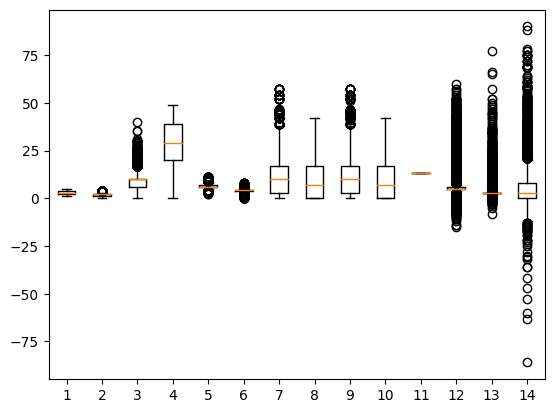

In [25]:
import matplotlib.pyplot as plt

#Extract data and convert them into Pandas for visualization
converted_data =imputed_df[numeric_features].toPandas()

figure = plt.boxplot(converted_data)
# Maximu outliers are in the last 4 columns:  'KickReturnYardage','PassLength', 'YardsAfterCatch','PlayResult'

          yardsToGo  HomeScoreBeforePlay  VisitorScoreBeforePlay  \
count  11565.000000         11565.000000            11565.000000   
mean       8.716645            11.342240                9.824903   
std        3.994726            10.211307                9.228397   
min        0.000000             0.000000                0.000000   
25%        6.000000             3.000000                0.000000   
50%       10.000000            10.000000                7.000000   
75%       10.000000            17.000000               17.000000   
max       40.000000            57.000000               42.000000   

       HomeScoreAfterPlay  VisitorScoreAfterPlay          down  
count        11565.000000           11565.000000  11565.000000  
mean            11.464505               9.931777      1.788586  
std             10.246051               9.255273      0.820130  
min              0.000000               0.000000      0.000000  
25%              3.000000               0.000000      1.000000

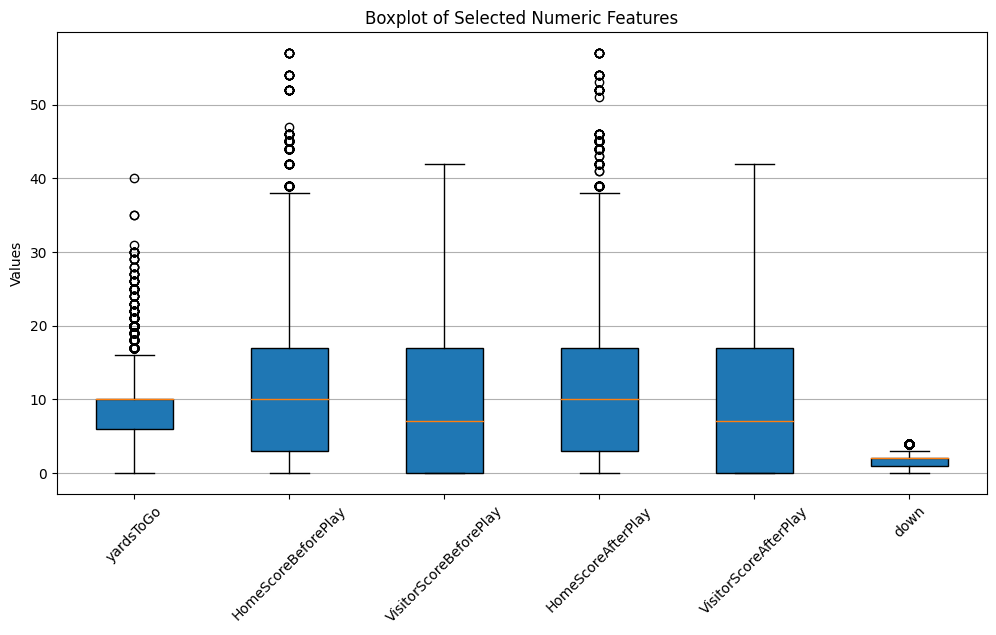

In [26]:
import matplotlib.pyplot as plt

# Selected important numeric features for plotting
selected_features = [
    'yardsToGo',
    'HomeScoreBeforePlay',
    'VisitorScoreBeforePlay',
    'HomeScoreAfterPlay',
    'VisitorScoreAfterPlay',
    'down'
]

# Extracting data for boxplot
spotted_data = imputed_df[selected_features].toPandas()

# Ensure data is not empty
print(spotted_data.describe())  # Check the statistics

# Create the boxplot
plt.figure(figsize=(12, 6))  # Adjust the figure size
figure_subset = plt.boxplot(spotted_data, patch_artist=True)  
plt.title("Boxplot of Selected Numeric Features")
plt.xticks(range(1, len(selected_features) + 1), selected_features, rotation=45)
plt.ylabel("Values")
plt.grid(axis='y')
plt.show()

#The summary shows that on average, teams face around 9 yards to go for a first down
#Most plays occur on 1st or 2nd down
#Home teams have slightly higher average scores than visitors

In [27]:

numeric_columns = [column[0] for column in imputed_df.dtypes if column[1] in ('int','double')]
imputed_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in numeric_columns]).show(1, vertical=True)


-RECORD 0---------------------
 gameId                 | 0   
 playId                 | 0   
 quarter                | 0   
 down                   | 0   
 yardsToGo              | 0   
 yardlineNumber         | 0   
 defendersInTheBox      | 0   
 numberOfPassRushers    | 0   
 HomeScoreBeforePlay    | 0   
 VisitorScoreBeforePlay | 0   
 HomeScoreAfterPlay     | 0   
 VisitorScoreAfterPlay  | 0   
 KickReturnYardage      | 0   
 PassLength             | 0   
 YardsAfterCatch        | 0   
 PlayResult             | 0   



<h2>4. Outliers</h2>

In [28]:
# Find outliers function

from functools import reduce

def column_add(a,b):
     return  a.__add__(b)
    
def find_outliers(df):
    # Identifying the numerical columns in a spark dataframe
    numeric_columns = [column[0] for column in df.dtypes if column[1]=='int']

    # Using the `for` loop to create new columns by identifying the outliers for each feature
    for column in numeric_columns:

        less_Q1 = 'less_Q1_{}'.format(column)
        more_Q3 = 'more_Q3_{}'.format(column)
        Q1 = 'Q1_{}'.format(column)
        Q3 = 'Q3_{}'.format(column)

        # Q1 : First Quartile ., Q3 : Third Quartile
        Q1 = df.approxQuantile(column,[0.25],relativeError=0)
        Q3 = df.approxQuantile(column,[0.75],relativeError=0)
        
        # IQR : Inter Quantile Range
        IQR = Q3[0] - Q1[0]
        
        #selecting the data, with -1.5*IQR to + 1.5*IQR., where param = 1.5 default value
        less_Q1 =  Q1[0] - 1.5*IQR
        more_Q3 =  Q3[0] + 1.5*IQR
        
        isOutlierCol = 'is_outlier_{}'.format(column)
        
        df = df.withColumn(isOutlierCol,when((df[column] > more_Q3) | (df[column] < less_Q1), 1).otherwise(0))
    

    # Selecting the specific columns which we have added above, to check if there are any outliers
    selected_columns = [column for column in df.columns if column.startswith("is_outlier")]
    # Adding all the outlier columns into a new colum "total_outliers", to see the total number of outliers
    df = df.withColumn('total_outliers',reduce(column_add, ( df[col] for col in  selected_columns)))

    # Dropping the extra columns created above, just to create nice dataframe., without extra columns
    df = df.drop(*[column for column in df.columns if column.startswith("is_outlier")])

    return df

In [29]:
df_with_outlier_handling = find_outliers(imputed_df)
df_with_outlier_handling.show(1, vertical=True)

-RECORD 0--------------------------------------
 gameId                 | 2017091004           
 playId                 | 73                   
 quarter                | 1                    
 GameClock              | 2024-10-03 14:54:00  
 down                   | 1                    
 yardsToGo              | 10                   
 possessionTeam         | ARI                  
 yardlineSide           | ARI                  
 yardlineNumber         | 23                   
 offenseFormation       | SHOTGUN              
 personnel_offense      | 1 RB, 1 TE, 3 WR     
 defendersInTheBox      | 6.0                  
 numberOfPassRushers    | 4.0                  
 personnel_defense      | 4 DL, 2 LB, 5 DB     
 HomeScoreBeforePlay    | 0                    
 VisitorScoreBeforePlay | 0                    
 HomeScoreAfterPlay     | 0                    
 VisitorScoreAfterPlay  | 0                    
 isPenalty              | false                
 isSTPlay               | false         

In [30]:
df_with_outlier_handling.groupby("total_outliers").count().show()

+--------------+-----+
|total_outliers|count|
+--------------+-----+
|             1| 1133|
|             3|   12|
|             4|    3|
|             2|  214|
|             0|10203|
+--------------+-----+



In [31]:
# There are only few outliers lets drop them without affecting data
df_with_substituted_na_and_outliers = df_with_outlier_handling.\
        filter(df_with_outlier_handling['total_Outliers']<=0)
print(df_with_substituted_na_and_outliers.count())

10203


<h2>5. Variable Distribution</h2>

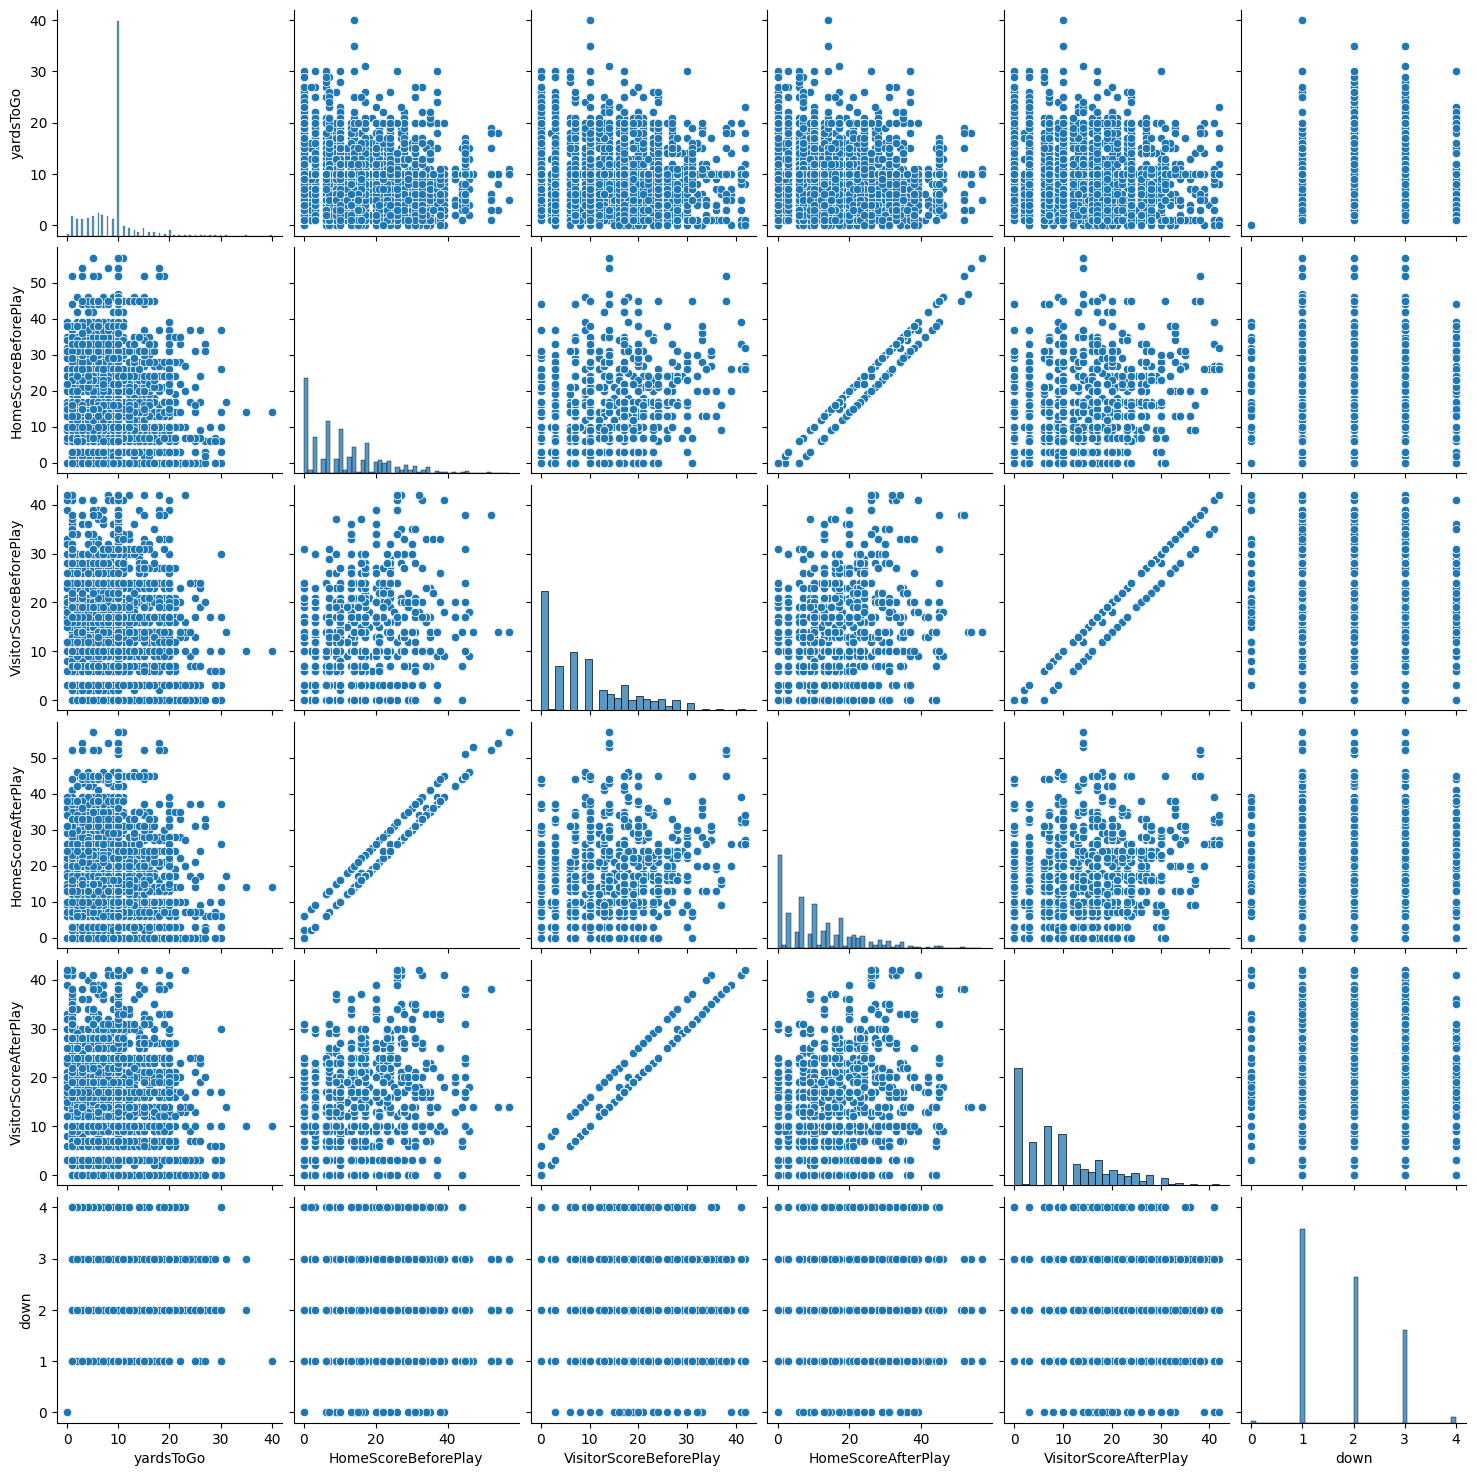

In [38]:
import seaborn as sb

sb.pairplot(spotted_data)

<h2>6. Correlations</h2>

In [39]:
correlation_matrix = df_with_substituted_na_and_outliers.toPandas().corr()
print(correlation_matrix)

                          gameId    playId   quarter      down  yardsToGo  \
gameId                  1.000000  0.015826  0.013236 -0.000769   0.003300   
playId                  0.015826  1.000000  0.958044 -0.004057  -0.006629   
quarter                 0.013236  0.958044  1.000000 -0.004724  -0.005610   
down                   -0.000769 -0.004057 -0.004724  1.000000  -0.383983   
yardsToGo               0.003300 -0.006629 -0.005610 -0.383983   1.000000   
yardlineNumber          0.018455 -0.005544 -0.003121  0.027164   0.107866   
defendersInTheBox       0.020922 -0.050617 -0.033740 -0.224910  -0.169764   
numberOfPassRushers     0.002239 -0.020338 -0.005967  0.071093  -0.043785   
HomeScoreBeforePlay    -0.019510  0.673211  0.636800 -0.017458  -0.012856   
VisitorScoreBeforePlay  0.045259  0.721500  0.696373 -0.019846  -0.009950   
HomeScoreAfterPlay     -0.020844  0.671273  0.634934 -0.015786  -0.023395   
VisitorScoreAfterPlay   0.045636  0.721094  0.695900 -0.018749  -0.018060   

/var/folders/z_/6qkk791d3db4c6dvxdh_9tg80000gn/T/ipykernel_11121/1692095180.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_with_substituted_na_and_outliers.toPandas().corr()


In [34]:
# Pair highly correctated variables and remove one highly correlated feature from each group
df_with_handled_correlations = df_with_substituted_na_and_outliers.drop(
    "HomeScoreAfterPlay",
    "VisitorScoreAfterPlay",
    "quarter"
)


<h2>7. Handle Binary Variables </h2>

In [36]:
from pyspark.sql.functions import col, when

# Convert boolean columns to integers (0 and 1)--> cast them
boolean_columns = ["isPenalty", "isSTPlay"]  # List of boolean columns identified

for column in boolean_columns:
    df_with_handled_correlations = df_with_handled_correlations.withColumn(
        column, 
        when(col(column) == True, 1).otherwise(0)  # Convert True to 1 and False to 0
    )

# Show the updated DataFrame to verify the changes
df_with_handled_correlations.show(5)


+----------+------+-------------------+----+---------+--------------+------------+--------------+----------------+-----------------+-----------------+-------------------+-----------------+-------------------+----------------------+---------+--------+--------------------+-----------------+----------+----------+---------------+----------+--------------------+--------------+
|    gameId|playId|          GameClock|down|yardsToGo|possessionTeam|yardlineSide|yardlineNumber|offenseFormation|personnel_offense|defendersInTheBox|numberOfPassRushers|personnel_defense|HomeScoreBeforePlay|VisitorScoreBeforePlay|isPenalty|isSTPlay|SpecialTeamsPlayType|KickReturnYardage|PassLength|PassResult|YardsAfterCatch|PlayResult|     playDescription|total_outliers|
+----------+------+-------------------+----+---------+--------------+------------+--------------+----------------+-----------------+-----------------+-------------------+-----------------+-------------------+----------------------+---------+--------+

<h2>8. Estimator Components</h2>

In [39]:
# from pyspark.ml.feature import StringIndexer, OneHotEncoder
# from pyspark.ml import Pipeline
# from pyspark.sql.functions import col, when

# # Identify the categorical features
# categorical_features = ['possessionTeam', 'offenseFormation', 'personnel_offense', 'PlayResult']  
# boolean_features = ['isPenalty', 'isSTPlay']  # Boolean features

# # Set up StringIndexer and OneHotEncoder for categorical variables [1]
# stages = []
# for feature in categorical_features:
#     indexer = StringIndexer(inputCol=feature, outputCol=feature + '_index')
#     encoder = OneHotEncoder(inputCols=[feature + '_index'], outputCols=[feature + '_encoded'])
#     stages += [indexer, encoder]

# # Create a Pipeline with the defined stages
# pipeline = Pipeline(stages=stages)

# # Fit and transform the data
# pipeline_model = pipeline.fit(df_with_handled_correlations)
# df_encoded = pipeline_model.transform(df_with_handled_correlations)

# # Show the transformed DataFrame
# df_encoded.show(truncate=False)


+----------+------+-------------------+----+---------+--------------+------------+--------------+----------------+-----------------+-----------------+-------------------+-----------------+-------------------+----------------------+---------+--------+--------------------+-----------------+----------+----------+---------------+----------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------+--------------------+----------------------+----------------------+------------------------+-----------------------+-------------------------+----------------+------------------+
|gameId    |playId|GameClock          |down|yardsToGo|possessionTeam|yardlineSide|yardlineNumber|offenseFormation|personnel_offense|defendersInTheBox|numberOfPassRushers|personnel_defense|HomeScoreBeforePlay|VisitorScoreBeforePlay|isPenalty|isSTPlay|SpecialTeamsPlayType|KickRetu

In [52]:
#estimator
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline

# Identify categorical columns for StringIndexer
categorical_cols = [
    "possessionTeam", 
    "yardlineSide", 
    "offenseFormation", 
    "personnel_offense", 
    "personnel_defense", 
    "SpecialTeamsPlayType", 
    "PassResult", 
    "playDescription"
]

# Create stages for indexing and one-hot encoding [4]
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index") for col in categorical_cols]
encoders = [OneHotEncoder(inputCols=[col + "_index"], outputCols=[col + "_encoded"]) for col in categorical_cols]

# Create a pipeline
pipeline = Pipeline(stages=indexers + encoders)

# Fit and transform the data
pipeline_model = pipeline.fit(df_encoded)
df_encoded = pipeline_model.transform(df_encoded)
# Show the transformed DataFrame
df_encoded.show(truncate=False)


+----------+------+-------------------+----+---------+--------------+------------+--------------+----------------+-----------------+-----------------+-------------------+-----------------+-------------------+----------------------+---------+--------+--------------------+-----------------+----------+----------+---------------+----------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------+----------------+------------------+--------------------+------------------+----------------------+-----------------------+-----------------------+--------------------------+----------------+---------------------+----------------------+--------------------+------------------------+-------------------------+-------------------------+----------------------------+------------------+-----------------------+
|gameId    |playId|GameClock          |down|yardsTo

24/10/03 17:05:53 WARN DAGScheduler: Broadcasting large task binary with size 1253.1 KiB


In [53]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline

# Stages for String Indexing
stage_1 = StringIndexer(inputCol='PlayResult', outputCol='PlayResult_index')

# Stage for One-Hot Encoding [5]
stage_2 = OneHotEncoder(inputCols=['PlayResult_index'], outputCols=['PlayResult_encoded'])

# Setup the pipeline
pipeline = Pipeline(stages=[stage_1, stage_2])

# Fit and transform the data
pipeline_model = pipeline.fit(df_with_handled_correlations)
df_encoded = pipeline_model.transform(df_with_handled_correlations)

# Show the resulting DataFrame
df_encoded.select("PlayResult", "PlayResult_index", "PlayResult_encoded").show(truncate=False)


+----------+----------------+------------------+
|PlayResult|PlayResult_index|PlayResult_encoded|
+----------+----------------+------------------+
|4         |2.0             |(32,[2],[1.0])    |
|2         |1.0             |(32,[1],[1.0])    |
|15        |17.0            |(32,[17],[1.0])   |
|-2        |13.0            |(32,[13],[1.0])   |
|0         |0.0             |(32,[0],[1.0])    |
|0         |0.0             |(32,[0],[1.0])    |
|5         |5.0             |(32,[5],[1.0])    |
|0         |0.0             |(32,[0],[1.0])    |
|0         |0.0             |(32,[0],[1.0])    |
|2         |1.0             |(32,[1],[1.0])    |
|0         |0.0             |(32,[0],[1.0])    |
|3         |3.0             |(32,[3],[1.0])    |
|6         |6.0             |(32,[6],[1.0])    |
|0         |0.0             |(32,[0],[1.0])    |
|-7        |23.0            |(32,[23],[1.0])   |
|-9        |29.0            |(32,[29],[1.0])   |
|1         |4.0             |(32,[4],[1.0])    |
|1         |4.0     

<h2>9. Combining Features into Single Vector</h2>

In [55]:
from pyspark.ml.feature import VectorAssembler
# Initialize the VectorAssembler with updated feature list
vector_assembler = VectorAssembler(
    inputCols=feature_list,  # Use the updated feature list
    outputCol="vectorized_features"  # Specify output column for vectorized features
)

# Transform the DataFrame to include the assembled feature vectors
df_with_assembled_features = vector_assembler.transform(df_encoded)

# Show the resulting DataFrame with the vectorized features
df_with_assembled_features.select("vectorized_features").show(1, truncate=False)


+----------------------------------------------------------------------------+
|vectorized_features                                                         |
+----------------------------------------------------------------------------+
|[2.017091004E9,73.0,1.0,10.0,23.0,6.0,4.0,0.0,0.0,0.0,0.0,13.0,-2.0,6.0,0.0]|
+----------------------------------------------------------------------------+
only showing top 1 row



In [56]:
# Dropping columns that aren't used for vectorization
columns_to_drop = [
    "GameClock",          
    "possessionTeam",       
    "yardlineSide",         
    "offenseFormation",     
    "personnel_offense",    
    "personnel_defense",    
    "SpecialTeamsPlayType",  
    "PassResult",           
    "playDescription"       
]

# Create a feature list after dropping unsupported columns
feature_list = df_encoded.drop(*columns_to_drop).columns

print("Feature List after dropping unsupported columns: ", feature_list) # Final features that will be use to make predictions etc...

#Initialize the VectorAssembler
vector_assembler = VectorAssembler(
    inputCols=feature_list,  
    outputCol="vectorized_features"  
)

# Transform the DataFrame to include the assembled feature vectors
df_with_assembled_features = vector_assembler.transform(df_encoded)

# Optional: Show the resulting DataFrame with the vectorized features and the target variable
df_with_assembled_features.select("vectorized_features", "PlayResult").show(5, truncate=False)


Feature List after dropping unsupported columns:  ['gameId', 'playId', 'down', 'yardsToGo', 'yardlineNumber', 'defendersInTheBox', 'numberOfPassRushers', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay', 'isPenalty', 'isSTPlay', 'KickReturnYardage', 'PassLength', 'YardsAfterCatch', 'PlayResult', 'total_outliers', 'PlayResult_index', 'PlayResult_encoded']
+---------------------------------------------------------------------------------------------------------------------------+----------+
|vectorized_features                                                                                                        |PlayResult|
+---------------------------------------------------------------------------------------------------------------------------+----------+
|(49,[0,1,2,3,4,5,6,11,12,13,14,16,19],[2.017091004E9,73.0,1.0,10.0,23.0,6.0,4.0,13.0,-2.0,6.0,4.0,2.0,1.0])                |4         |
|(49,[0,1,2,3,4,5,6,11,12,13,14,16,18],[2.017091004E9,97.0,2.0,6.0,27.0,6.0,4.217287630402384,13

The final DataFrame df_with_assembled_features has:

- Vectorized Features: This representation allows the machine learning model to process the input data effectively. 
- Target Variable: PlayResult, which will be predicted.


The values in the vector are encode values of features corresponding to those non-zero numbers specifed at the respective indices. 

<h2>10. Data Scaling</h2>

In [57]:
from pyspark.ml.feature import StandardScaler
from pyspark.ml import Pipeline

# Step 1: Initialize the StandardScaler [6]
standard_scaler = StandardScaler(
    inputCol='vectorized_features',  # Column with vectorized features
    outputCol='features',  # Column for storing scaled features
    withMean=True,  # If true, subtracts the mean before scaling
    withStd=True    # If true, scales to unit variance
)

# Step 2: Fit the StandardScaler Model 
scaled_model = standard_scaler.fit(df_with_assembled_features)

# Step 3: Transform the DataFrame to include scaled features
df_with_scaled_features = scaled_model.transform(df_with_assembled_features)

# Step 4: Select the relevant columns to review
result_df = df_with_scaled_features.select("PlayResult", "PlayResult_encoded", "features").distinct()

# Convert to Pandas DataFrame for better visualization
result_df_pd = result_df.toPandas()

# Display the result
print(result_df_pd)


       PlayResult                                 PlayResult_encoded  \
0               0  (1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1              -5  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2               3  (0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3             -10  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4              13  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
...           ...                                                ...   
10198           0  (1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
10199          15  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
10200           4  (0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
10201           0  (1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
10202           0  (1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                features  
0      [-1.116617504446263, -0.5011150934176463, 0.32...  
1      [-1.117056

The scaling result shows three columns: PlayResult (the original target variable), PlayResult_encoded (one-hot encoded representation of the play outcomes), and features (scaled numerical feature vectors). The features column contains standardized values of input variables, ensuring all features have similar magnitudes for better model training.

The above ouput is obtained after data scaling

## References

[1] Lecture_2_Introduction_to_Cloud_and_Spark.ipynb   
[2] Lectures_6_and_7_Data_Engineering.ipynb    
[3] https://codelabs.developers.google.com/codelabs/spark-jupyter-dataproc#6    
[4] https://www.machinelearningplus.com/pyspark/pyspark-stringindexer/   
[5] https://medium.com/@nutanbhogendrasharma/role-of-onehotencoder-and-pipelines-in-pyspark-ml-feature-part-2-3275767e74f0    
[6] https://stackoverflow.com/questions/64219656/how-to-implement-pyspark-standardscaler-on-subset-of-columns    


